In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import pickle

In [3]:
sns.set()

Read in the training data and the dictionary with column descriptions.

In [4]:
train_data = pd.read_csv('Data/train_data_raw.csv', low_memory=False)
data_dict = pd.read_excel('Data/LCDataDictionary.xlsx')

Initial glance at our data.

In [55]:
train_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252971 entries, 0 to 252970
Data columns (total 72 columns):
id                             252971 non-null int64
member_id                      252971 non-null int64
loan_amnt                      252971 non-null float64
funded_amnt                    252971 non-null float64
funded_amnt_inv                252971 non-null float64
term                           252971 non-null object
int_rate                       252971 non-null float64
installment                    252971 non-null float64
grade                          252971 non-null object
sub_grade                      252971 non-null object
emp_title                      239040 non-null object
emp_length                     243074 non-null object
home_ownership                 252971 non-null object
annual_inc                     252971 non-null float64
verification_status            252971 non-null object
issue_d                        252971 non-null object
loan_status          

We can see that there are **72 columns** in our train set of the following types: **52 numeric** and **20 object**.

Let's investigate the contents of the dictionary with column descriptions. Since the dictionary and the credit data weren't bundled together, we have to check for any missing or superfluous information.

In [57]:
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_rows', 80)

# Last 2 rows do not contain exta information and can be dropped
data_dict = data_dict.iloc[:-2, :]
data_dict.columns = ['column_name', 'description']
data_dict

,column_name,description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
7,desc,Loan description provided by the borrower
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"


In [58]:
extra_columns_in_dict = list((set(data_dict['column_name']) - set(train_data.columns)))
print(f'Extra columns in the dictionary:\n{extra_columns_in_dict}\n')

extra_columns_in_trainset = list(set(train_data.columns) - (set(data_dict['column_name'])))
print(f'Extra columns in the train set:\n{extra_columns_in_trainset}')

Extra columns in the dictionary:
['open_il_6m', 'total_rev_hi_lim \xa0', 'is_inc_v', 'last_fico_range_high', 'verified_status_joint', 'fico_range_high', 'last_fico_range_low', 'url', 'fico_range_low']

Extra columns in the train set:
['verification_status_joint', 'total_rev_hi_lim', 'verification_status']


Recall that while preparing the train and test sets we have removed the **url** and **open_il_6m** columns from the train set to make the column collections in both sets the same. Now, we need to deal with the seemingly additional columns in the data set and update our dictionary.

The description of the column **is_inc_v** in the dictionary reads as follows:
"Indicates if income was verified by LC, not verified, <br> or if the income source was verified". Below, we compare it with the column **verification_status** in the train set and conclude that these columns are in fact the same.

The columns **verified_status_joint** in the dictionary and **verification_status_joint** are most certainly the same, however, <br> it doesn't really matter since the latter column consists almost entirely of NaN values and will be dropped in due time.

As for the columns **total_rev_hi_lim \xa0** and **total_rev_hi_lim**, it's clearly an issue of  extra whitespace in the first name - these columns are the same.

In [59]:
for column in extra_columns_in_trainset:
    print(train_data[column].value_counts(dropna=False).head())
    print()

NaN                252970
Source Verified         1
Name: verification_status_joint, dtype: int64

NaN         63708
 13500.0      676
 9000.0       673
 15000.0      649
 11500.0      645
Name: total_rev_hi_lim, dtype: int64

Verified           92896
Not Verified       86064
Source Verified    74011
Name: verification_status, dtype: int64



In [60]:
print('Names before the name update:')
index = data_dict['column_name'].isin(['verified_status_joint', 'total_rev_hi_lim \xa0', 
                                       'is_inc_v'])
print(data_dict.loc[index, 'column_name'])
print()

print('Names after the name update:')
data_dict.loc[index, 'column_name'] = ['verification_status', 'verification_status_joint', 
                                       'total_rev_hi_lim']
data_dict.loc[index, 'column_name']

Names before the name update:
24                 is_inc_v
58    verified_status_joint
71       total_rev_hi_lim  
Name: column_name, dtype: object

Names after the name update:


24          verification_status
58    verification_status_joint
71             total_rev_hi_lim
Name: column_name, dtype: object

In [61]:
data_dict = data_dict.loc[~data_dict['column_name'].isin(extra_columns_in_dict), :]
data_dict = data_dict.reset_index(drop=True)
data_dict

,column_name,description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
3,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
4,collection_recovery_fee,post charge off collection fee
5,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
6,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
7,desc,Loan description provided by the borrower
8,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
9,dti_joint,"A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income"


Let's save this cleaned up dictionary to a file.

In [62]:
with open('Data/data_dict.pkl', 'wb') as file:
    pickle.dump(data_dict, file)

Having unified our data set and dictionary column names, we can safely mark the columns **id** and **member_id** for deletion as they are the columns of unique IDs. However, we have to screen the data for the potential information leaks and try to remove the columns containing information that became available only after the loan had been granted. But before we embark on this quest, we are going to rid ourselves of all the columns with the majority of missing values.

In [63]:
dataframe_operations = {}
dataframe_operations['columns_to_drop'] = ['id', 'member_id']
{key: len(val) for key, val in dataframe_operations.items()}

{'columns_to_drop': 2}

View the null/nan value percentage per column as well as this percentage distribution.

In [64]:
train_data_null_pct = train_data.isnull().mean().sort_values(ascending=False)
print(train_data_null_pct)

next_pymnt_d                   1.000000
annual_inc_joint               0.999996
dti_joint                      0.999996
verification_status_joint      0.999996
il_util                        0.999502
mths_since_rcnt_il             0.999447
open_il_24m                    0.999431
open_acc_6m                    0.999431
open_il_12m                    0.999431
inq_last_12m                   0.999431
total_bal_il                   0.999431
open_rv_12m                    0.999431
open_rv_24m                    0.999431
max_bal_bc                     0.999431
all_util                       0.999431
total_cu_tl                    0.999431
inq_fi                         0.999431
mths_since_last_record         0.875092
mths_since_last_major_derog    0.812054
desc                           0.650873
mths_since_last_delinq         0.556665
tot_cur_bal                    0.251839
tot_coll_amt                   0.251839
total_rev_hi_lim               0.251839
emp_title                      0.055070


In [65]:
NULL_PCT_THRSHLD = 0.50
n_cols_above_thrshld = (train_data_null_pct > NULL_PCT_THRSHLD).sum()
print(f'Number of columns with more than {int(100 * NULL_PCT_THRSHLD)}% of missing values:\
 {n_cols_above_thrshld}')

Number of columns with more than 50% of missing values: 21


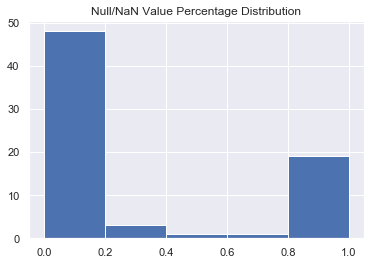

In [66]:
sns.distplot(train_data_null_pct.values, kde=False, bins=5, 
             hist_kws={"alpha": 1})
plt.title('Null/NaN Value Percentage Distribution')
plt.show()

Evidently, those 21 columns with majority of missing values are not very useful and can be marked for unconditional deletion.

Note that even though the columns **mths_since_last_record**, **mths_since_last_major_derog**, **mths_since_last_delinq**, and **desc** contain enough non-missing values to be considered for making binary missing/non-missing indicators out of them, only <br> the **desc** is guaranteed not to leak information from the future (as will be explained presently). Hence, we mark it for feature engineering.

Now, we can update our data dictionary and try to remove the potential information leaks - the keywords or expressions to look for in the column description include: outstanding, remaining, to date, last, now, current, etc.

In [67]:
dataframe_operations['columns_to_drop'] += train_data_null_pct[:n_cols_above_thrshld].index.values.tolist()
dataframe_operations['columns_to_engineer'] = ['desc']
{key: len(val) for key, val in dataframe_operations.items()}

{'columns_to_drop': 23, 'columns_to_engineer': 1}

In [68]:
data_dict = data_dict.loc[~data_dict['column_name'].\
                          isin(dataframe_operations['columns_to_drop']), :]
data_dict = data_dict.reset_index(drop=True)
data_dict

,column_name,description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
3,collection_recovery_fee,post charge off collection fee
4,collections_12_mths_ex_med,Number of collections in 12 months excluding medical collections
5,delinq_2yrs,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
6,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
7,earliest_cr_line,The month the borrower's earliest reported credit line was opened
8,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
9,emp_title,The job title supplied by the Borrower when applying for the loan.*


Having gone through the descriptions, we identify the following columns as possibly containing the information not available at the time of the loan grant approval (lest's call them the future updates):
- **collection_recovery_fee**, **collections_12_mths_ex_med** and **delinq_2yrs** (the loans are given for 3 or 5 years, so these columns might refelct the future updates), **funded_amnt** and **funded_amnt_inv** (these two are highly correlated with loan_amount (correlation coefficient > 0.99) which renders them redundant anyway), **inq_last_6mths**, **issue_d**, **last_credit_pull_d**, **last_pymnt_amnt** and **last_pymnt_d**, **out_prncp** and **out_prncp_inv**, **recoveries**, **total_acc**, **total_pymnt** and **total_pymnt_inv**, **total_rec_int**, **total_rec_late_fee** and **total_rec_prncp**, **acc_now_delinq** (this column is almost constant anyway (value of 0 in more that 99.7% entries)), **tot_coll_amt** (due to the description wording this column might reflect the future updates), **tot_cur_bal**

It is not clear whether the columns **open_acc** and **pub_rec** reflect any future updates, since their descriptions lack any indication of time, so we assume that they are acceptable. Hence, we can again update our data dictionary.

In [69]:
dataframe_operations['columns_to_drop'] += [
    'collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_2yrs', 
    'funded_amnt', 'funded_amnt_inv', 'inq_last_6mths', 'issue_d', 'last_credit_pull_d', 
    'last_pymnt_amnt', 'last_pymnt_d', 'out_prncp', 'out_prncp_inv', 'recoveries', 
    'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 
    'total_rec_prncp', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal'
]
{key: len(val) for key, val in dataframe_operations.items()}

{'columns_to_drop': 45, 'columns_to_engineer': 1}

In [70]:
data_dict = data_dict.loc[~data_dict['column_name'].\
                          isin(dataframe_operations['columns_to_drop']), :]
data_dict = data_dict.reset_index(drop=True)
data_dict

,column_name,description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
3,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
4,earliest_cr_line,The month the borrower's earliest reported credit line was opened
5,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
6,emp_title,The job title supplied by the Borrower when applying for the loan.*
7,grade,LC assigned loan grade
8,home_ownership,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."
9,initial_list_status,"The initial listing status of the loan. Possible values are – W, F"


Now, we are going to have a look at the remaining 27 columns.

In [71]:
train_data.loc[:, data_dict['column_name']].dtypes.value_counts()

object     15
float64    11
int64       1
dtype: int64

Let's check the number of the unique values and the null values.

In [72]:
nunique_obj = train_data.drop(columns=dataframe_operations['columns_to_drop']).\
                         select_dtypes(include=['object']).nunique().sort_values()
null_obj = train_data.drop(columns=dataframe_operations['columns_to_drop']).\
                      select_dtypes(include=['object']).isnull().sum()

pd.DataFrame({
    'unique_values': nunique_obj, 
    'null_values': null_obj}).sort_values(by=['unique_values'])

,unique_values,null_values
application_type,2,0
initial_list_status,2,0
pymnt_plan,2,0
term,2,0
verification_status,3,0
home_ownership,6,0
grade,7,0
emp_length,11,9897
purpose,14,0
sub_grade,35,0


In [73]:
nunique_num = train_data.drop(columns=dataframe_operations['columns_to_drop']).\
                         select_dtypes(include=['number']).nunique().sort_values()
null_num = train_data.drop(columns=dataframe_operations['columns_to_drop']).\
                      select_dtypes(include=['number']).isnull().sum()

pd.DataFrame({
    'unique_values': nunique_num, 
    'null_values': null_num}).sort_values(by=['unique_values'])

,unique_values,null_values
policy_code,1,0
loan_status,2,0
pub_rec,14,0
open_acc,59,0
int_rate,513,0
revol_util,1199,199
loan_amnt,1326,0
dti,3978,0
total_rev_hi_lim,9543,63708
annual_inc,19483,0


We can see right off the bat that the column **policy_code** is constant, thus we add it to the columns marked for deletion.

In [74]:
dataframe_operations['columns_to_drop'] += ['policy_code']
{key: len(val) for key, val in dataframe_operations.items()}

{'columns_to_drop': 46, 'columns_to_engineer': 1}

On the other end of the unique value spectrum there are two text columns, namely **emp_title** and **title**. The former contains over 132,000 distinct employer business names which makes it unusable and can be safely dropped, the latter contains "the loan title provided by the borrower" which on the face of it might be useful. However, after comparing it to the column **purpose** (in the cell below), it is clear that **purpose** sums up the text in **title** almost pefectly, rendering it redundunt. Hence, we enlarge our collection of columns to be deleted by adding the columns **emp_title** and **title**.

In [75]:
train_data.loc[:, ['title', 'purpose']].head(10)

,title,purpose
0,Computer,credit_card
1,bike,car
2,real estate business,small_business
3,personel,other
4,My wedding loan I promise to pay back,wedding
5,Car Downpayment,car
6,Expand Business & Buy Debt Portfolio,small_business
7,Building my credit history.,other
8,High intrest Consolidation,debt_consolidation
9,Consolidation,debt_consolidation


In [76]:
dataframe_operations['columns_to_drop'] += ['emp_title', 'title']
{key: len(val) for key, val in dataframe_operations.items()}

{'columns_to_drop': 48, 'columns_to_engineer': 1}

Let's check the distribution of the values for the categorical variables with at most 3 distinct values.

In [77]:
for column in nunique_obj.index[:5]:
    print(train_data[column].value_counts(dropna=False).head(3))
    print()

 36 months    196658
 60 months     56313
Name: term, dtype: int64

n    252969
y         2
Name: pymnt_plan, dtype: int64

f    182079
w     70892
Name: initial_list_status, dtype: int64

INDIVIDUAL    252970
JOINT              1
Name: application_type, dtype: int64

Verified           92896
Not Verified       86064
Source Verified    74011
Name: verification_status, dtype: int64



It turns out that the columns **pymnt_plan** and **application_type** are virtually constant and can be dropped.

In [78]:
dataframe_operations['columns_to_drop'] += ['pymnt_plan', 'application_type']
{key: len(val) for key, val in dataframe_operations.items()}

{'columns_to_drop': 50, 'columns_to_engineer': 1}

The columns **addr_state** and **zip_code** contain the same information but at different levels of granulity. However, neither column in its pure form is a suitable candidate due to large number of distinct categories (51 and 886, respectively). Fortuantelly, not all hope is gone, since we will be able to  decrese the level of garnulity by considering only the first digit of the zip code which will produce a variable with more manageable number of 10 categories. 

Some visualizations of **addr_state** and the to-be-created column might make things more clear. We will show how the percentage of the bad loans varies depending on the category with respect to which it has been computed.

Note that several categories of the **addr_state** column are underepresented which results in the percentage values not being reliable. No such problem exists for the other variable.

In [79]:
def get_bad_loan_pct_by_category_01(df, column_list, category_list, 
                                 agg_func_list=['mean', 'count']):
    """
    Plots the bad loan percentage by category and returns the data frame 
    containing such averaged percentage values by category
    """

    agg_column = column_list[0]
    df_agg = df[column_list].groupby(agg_column).agg(agg_func_list)
    df_agg.columns = df_agg.columns.droplevel(0)
    
    # Turn into a percentage
    if 'mean' in agg_func_list:
        df_agg['mean'] *= 100
    
    df_agg = df_agg.round(2).reset_index()
    df_agg.rename(
        columns=lambda col_name: 'bad_loan_pct' if col_name == 'mean' else col_name, 
        inplace=True
    )
    df_agg.rename(
        columns=lambda col_name: 'loan_count' if col_name == 'count' else col_name, 
        inplace=True
    )
    
    plt.figure(figsize=(17, 6))
    sns.pointplot(data=df_agg, x=agg_column , y='bad_loan_pct', color='b')
    plt.title('Bad Loan Percentage per Category')
    plt.show()
    
    return df_agg

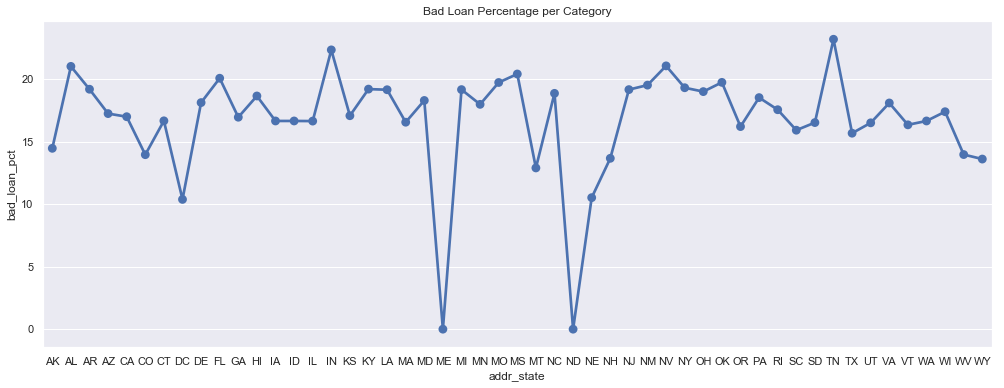

,addr_state,bad_loan_pct,loan_count
0,AK,14.48,663
1,AL,21.04,3147
2,AR,19.21,1754
3,AZ,17.26,6077
4,CA,17.01,43110
5,CO,13.97,5613
6,CT,16.68,3681
7,DC,10.39,837
8,DE,18.14,667
9,FL,20.09,17545


In [80]:
column_list = ['addr_state', 'loan_status']
category_list = np.sort(
    train_data[column_list[0]].value_counts().index.values).tolist()

get_bad_loan_pct_by_category(train_data, column_list, category_list)

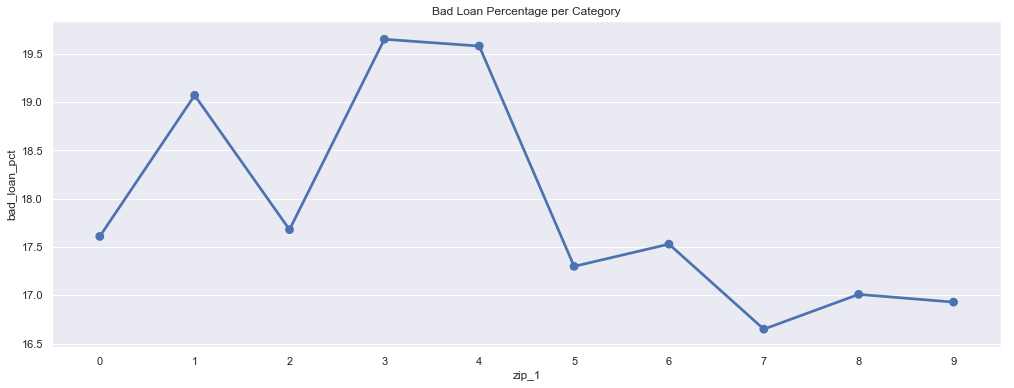

,zip_1,bad_loan_pct,loan_count
0,0,17.61,22119
1,1,19.07,30370
2,2,17.68,25672
3,3,19.65,31570
4,4,19.58,18811
5,5,17.30,8834
6,6,17.53,15307
7,7,16.65,26181
8,8,17.01,19587
9,9,16.93,54520


In [81]:
# The future zip_1 variable
column_list = ['zip_1', 'loan_status']
train_tmp = train_data.copy()
train_tmp[column_list[0]] = train_tmp['zip_code'].apply(lambda row: int(row[:1]))
category_list = np.sort(
    train_tmp[column_list[0]].value_counts().index.values).tolist()

get_bad_loan_pct_by_category_01(train_tmp, column_list, category_list)

For now, we register our choice to drop  **addr_state** and perform feature engineering on **zip_code**.

In [82]:
dataframe_operations['columns_to_engineer'] += ['zip_code']
dataframe_operations['columns_to_drop'] += ['addr_state']
{key: len(val) for key, val in dataframe_operations.items()}

{'columns_to_drop': 51, 'columns_to_engineer': 2}

Let's turn our attention to the following columns: **grade**, **sub_grade** and **int_rate**, which denote the grade, subgrade and interest rate of a loan. First, we are going to visualize the bad loan percentage values per category and compare them with the average interest rates per category. Note that they are very strongly correlated.

In [83]:
def get_bad_loan_pct_by_category_02(df, category_list, agg_column, agg_func_dict, 
                                     show_plots=True):
    """
    Plots the bad loan percentage by category and returns the data frame 
    containing such averaged percentage values by category
    """
   
    column_subset = list(agg_func_dict.keys()) + [agg_column]
    df_agg = df[column_subset].groupby(agg_column).agg(agg_func_dict)
    # Flatten multiindexed columns
    df_agg.columns = ['_'.join(col).strip() for col in df_agg.columns.values]
    
    # Turn into a percentage
    if 'mean' in agg_func_dict['loan_status']:
        df_agg['loan_status_mean'] *= 100
    
    df_agg = df_agg.round(2).reset_index()
    
    df_agg.rename(
        columns=lambda col_name: 'bad_loan_pct' if col_name == 'loan_status_mean' else col_name, 
        inplace=True
    )
    df_agg.rename(
        columns=lambda col_name: 'loan_count' if col_name == 'int_rate_count' else col_name, 
        inplace=True
    )
    
    if show_plots:
        plt.figure(figsize=(10, 6))
        sns.pointplot(data=df_agg, x=agg_column , y='bad_loan_pct', color='b')
        plt.title('Bad Loan Percentage per Credit Category')
        plt.show()

        plt.figure(figsize=(10, 6));
        sns.regplot(data=df_agg, y='bad_loan_pct', x='int_rate_mean', ci=None, 
                    color='b', line_kws={'color': 'r', 'lw': 2})
        plt.title('Average Interest Rate vs. Bad Loan Percentage per Credit Category')
        plt.show()
    
    print(f'Correlation with bad_loan_pct:\n{df_agg.corr().iloc[0, 1:-1]}')
    
    return df_agg

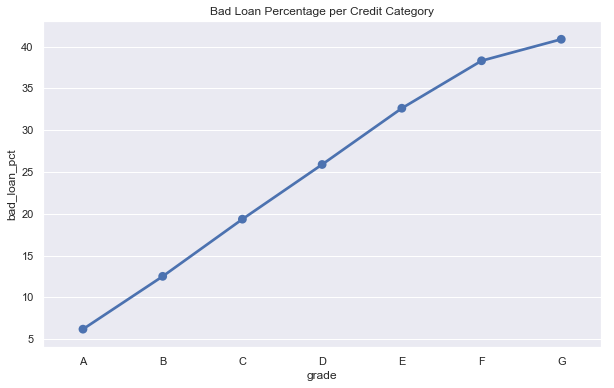

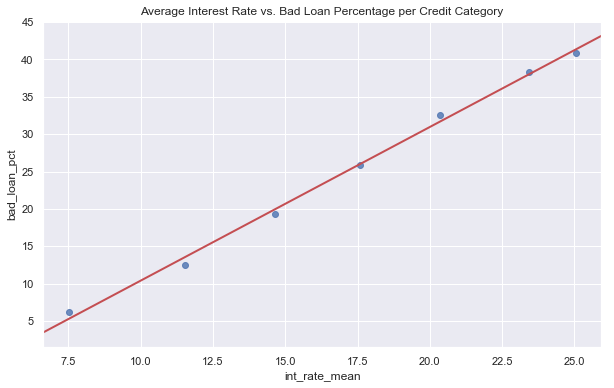

Correlation with bad_loan_pct:
int_rate_mean      0.998278
int_rate_std       0.957753
int_rate_min       0.562383
int_rate_median    0.997894
int_rate_max       0.995682
Name: bad_loan_pct, dtype: float64


,grade,bad_loan_pct,int_rate_mean,int_rate_std,int_rate_min,int_rate_median,int_rate_max,loan_count
0,A,6.19,7.51,1.00,5.32,7.62,9.63,42296
1,B,12.51,11.55,1.33,6.00,11.55,14.09,76065
2,C,19.35,14.63,1.26,6.00,14.49,17.27,65320
3,D,25.89,17.58,1.40,6.00,17.76,20.31,40506
4,E,32.62,20.34,1.69,6.00,20.49,23.40,19186
5,F,38.30,23.42,1.71,6.00,23.70,25.99,7660
6,G,40.87,25.04,1.77,17.34,25.80,28.99,1938


In [84]:
agg_column = 'grade' 
agg_func_dict = {'loan_status': 'mean', 
                 'int_rate': ['mean', 'std', 'min', 'median', 'max', 'count']}
category_list = np.sort(
    train_data[agg_column].value_counts().index.values).tolist()

get_bad_loan_pct_by_category_02(train_data, category_list, agg_column, agg_func_dict)

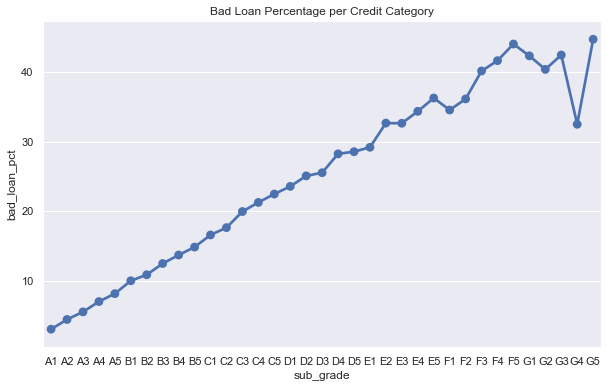

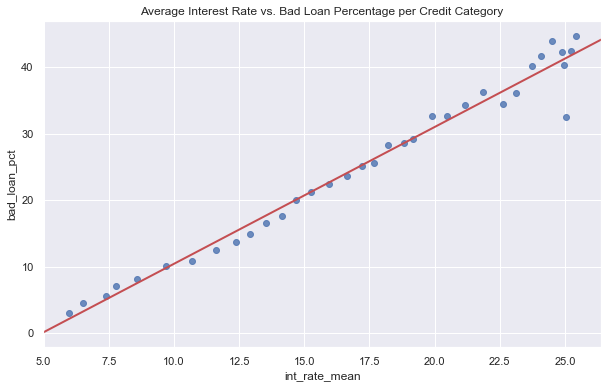

Correlation with bad_loan_pct:
int_rate_mean      0.987610
int_rate_std       0.962587
int_rate_min       0.682481
int_rate_median    0.986889
int_rate_max       0.981047
Name: bad_loan_pct, dtype: float64


,sub_grade,bad_loan_pct,int_rate_mean,int_rate_std,int_rate_min,int_rate_median,int_rate_max,loan_count
0,A1,3.08,5.96,0.25,5.32,6.03,7.37,5870
1,A2,4.47,6.53,0.31,5.79,6.62,7.68,6202
2,A3,5.56,7.39,0.38,6.17,7.62,8.00,7173
3,A4,7.04,7.77,0.41,6.00,7.90,9.32,11058
4,A5,8.18,8.60,0.50,6.00,8.90,9.63,11993
5,B1,10.03,9.69,0.58,6.00,9.76,11.14,12096
6,B2,10.89,10.68,0.59,6.00,10.99,11.48,14628
7,B3,12.50,11.62,0.68,6.00,11.99,12.12,18068
8,B4,13.72,12.39,0.82,6.00,12.49,13.11,16933
9,B5,14.86,12.93,0.98,6.00,12.99,14.09,14340


In [85]:
agg_column = 'sub_grade' 
agg_func_dict = {'loan_status': 'mean', 
                 'int_rate': ['mean', 'std', 'min', 'median', 'max', 'count']}
category_list = np.sort(
    train_data[agg_column].value_counts().index.values).tolist()

get_bad_loan_pct_by_category_02(train_data, category_list, agg_column, agg_func_dict)

We can observe almost perfectly linear relationship between the bad loan percentages and the average interest rates. This indicates that the columns **grade**, **sub_grade** and **int_rate** contain the same information at different levels of granularity. Therefore, to avoid redunduncy, we decide to keep the **int_rate** column and drop the remaining two columns.

In [86]:
dataframe_operations['columns_to_drop'] += ['grade', 'sub_grade']
{key: len(val) for key, val in dataframe_operations.items()}

{'columns_to_drop': 53, 'columns_to_engineer': 2}

There is one more issue that we have to address before we move on - the unbelievably low minimal values of the interest rates <br> in some categories. When we look at both the average interest rates and the standard deviations per category, we can see that these minima are out of the ballpark - many, many standard deviations away from where they should be. Let's investigate this further.

In [87]:
print(train_data.loc[train_data['int_rate'] == 6, 'grade'].value_counts())
train_data.loc[train_data['int_rate'] == 6, 'grade'].value_counts().sum()

C    15
B    12
D    10
E     5
A     2
F     1
Name: grade, dtype: int64


45

As we can see, there are 45 records with the interest rate being equal to 6. Those not in the grade A category are plainly wrong and should be removed. Those 2 in the grade A category are in fact in subgrades A4 and A5, over 4 or 5 standard deviations away, respectively. Though not impossible, it is most likely due to some error, hence we decide to remove all such records from our data set.

In [88]:
dataframe_operations['rows_to_drop'] = train_data.index[train_data['int_rate'] == 6].\
                                                  values.tolist()
{key: len(val) for key, val in dataframe_operations.items()}

{'columns_to_drop': 53, 'columns_to_engineer': 2, 'rows_to_drop': 45}

Let's verify that removing these rows brings back normality.

In [89]:
agg_column = 'grade' 
agg_func_dict = {'loan_status': 'mean', 
                 'int_rate': ['mean', 'std', 'min', 'median', 'max', 'count']}
category_list = np.sort(
    train_data[agg_column].value_counts(dropna=True).index.values).tolist()

train_tmp = train_data.copy().drop(index=dataframe_operations['rows_to_drop'])

get_bad_loan_pct_by_category_02(train_tmp, category_list, agg_column, 
                                agg_func_dict, show_plots=False)

Correlation with bad_loan_pct:
int_rate_mean      0.998315
int_rate_std       0.956834
int_rate_min       0.989758
int_rate_median    0.997899
int_rate_max       0.995685
Name: bad_loan_pct, dtype: float64


,grade,bad_loan_pct,int_rate_mean,int_rate_std,int_rate_min,int_rate_median,int_rate_max,loan_count
0,A,6.19,7.51,1.00,5.32,7.62,9.63,42294
1,B,12.52,11.55,1.33,8.18,11.55,14.09,76053
2,C,19.36,14.63,1.26,10.28,14.49,17.27,65305
3,D,25.89,17.58,1.39,11.86,17.76,20.31,40496
4,E,32.62,20.35,1.68,13.43,20.49,23.40,19181
5,F,38.31,23.43,1.70,15.01,23.70,25.99,7659
6,G,40.87,25.04,1.77,17.34,25.80,28.99,1938


In [90]:
agg_column = 'sub_grade' 
agg_func_dict = {'loan_status': 'mean', 
                 'int_rate': ['mean', 'std', 'min', 'median', 'max', 'count']}
category_list = np.sort(
    train_data[agg_column].value_counts(dropna=True).index.values).tolist()

train_tmp = train_data.copy().drop(index=dataframe_operations['rows_to_drop'])

get_bad_loan_pct_by_category_02(train_tmp, category_list, agg_column, 
                                agg_func_dict, show_plots=False)

Correlation with bad_loan_pct:
int_rate_mean      0.987610
int_rate_std       0.959869
int_rate_min       0.963942
int_rate_median    0.986861
int_rate_max       0.981009
Name: bad_loan_pct, dtype: float64


,sub_grade,bad_loan_pct,int_rate_mean,int_rate_std,int_rate_min,int_rate_median,int_rate_max,loan_count
0,A1,3.08,5.96,0.25,5.32,6.03,7.37,5870
1,A2,4.47,6.53,0.31,5.79,6.62,7.68,6202
2,A3,5.56,7.39,0.38,6.17,7.62,8.00,7173
3,A4,7.05,7.77,0.41,6.54,7.90,9.32,11057
4,A5,8.18,8.60,0.50,6.91,8.90,9.63,11992
5,B1,10.03,9.70,0.58,8.18,9.76,11.14,12093
6,B2,10.89,10.68,0.58,9.01,10.99,11.48,14626
7,B3,12.50,11.62,0.67,9.33,11.99,12.12,18066
8,B4,13.72,12.39,0.81,9.64,12.49,13.11,16930
9,B5,14.86,12.93,0.98,9.96,12.99,14.09,14338


Indeed, now these minima seem more plausible than before.

The last column that we want to comment on at this point is **earliest_cr_line** containing strings of the form MMM-YYYY, where MMM and YYYY denote the month and the year of the earliest reported open credit line, respectively. We will extract this information and turn this column into two new columns for further analysis. For now, we mark this column for feature engineering.

In [91]:
dataframe_operations['columns_to_engineer'] += ['earliest_cr_line']
{key: len(val) for key, val in dataframe_operations.items()}

{'columns_to_drop': 53, 'columns_to_engineer': 3, 'rows_to_drop': 45}

It is time to update our dictionary and have a look at what columns we are left with.

In [92]:
data_dict = data_dict.loc[~data_dict['column_name'].\
                          isin(dataframe_operations['columns_to_drop']), :]
data_dict = data_dict.reset_index(drop=True)
data_dict

,column_name,description
0,annual_inc,The self-reported annual income provided by the borrower during registration.
1,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
2,earliest_cr_line,The month the borrower's earliest reported credit line was opened
3,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
4,home_ownership,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."
5,initial_list_status,"The initial listing status of the loan. Possible values are – W, F"
6,installment,The monthly payment owed by the borrower if the loan originates.
7,int_rate,Interest Rate on the loan
8,verification_status,"Indicates if income was verified by LC, not verified, or if the income source was verified"
9,loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."


Now, we can save the dataframe_operations dictionary for further use.

In [93]:
with open('Data/dataframe_operations_01.pkl', 'wb') as file:
    pickle.dump(dataframe_operations, file)